In [18]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt


def nash_equilibrium(a):
    #a = []
    #for i in range(n):
    #    a.append(list(map(int,input().split())))
    matrix1 = np.matrix(a)
    mmin = 1;
    for i in range(len(matrix1)):
        for j in range(len(np.transpose(matrix1))):
            mmin = min(matrix1[i,j], mmin)
    #print(mmin)
    #проверяем матрицу на неположительность и если нужно преобразовываем
    if (mmin <= 0):
        matrix1 += abs(mmin)+1
    matrix2 = (-1) * np.transpose(matrix1)
    c1 = np.ones(len(matrix1))
    c2 = np.ones(len(matrix2))
    #решения линейных задач программирования для игроков
    res1 = linprog(c1, matrix2,-c2)
    res2 = linprog(-c2,matrix1,c1)
    #print(res1)
    v = 1/(res1.fun)
    #вычисление оптимальных смешанных стратегий для игроков
    finres1 = v*res1.x
    finres2 = v*res2.x
    f1 = np.array(finres1)
    nzer = 0;
    notzer = 0;
    for i in range(len(f1)):
        if (f1[i] == 0):
            nzer += 1
        else:
            notzer += 1
    if (notzer == 1):
        print("Существует решение в чистых стратегиях")
    elif(nzer == 0):
        print("Спектр оптимальной стратегии полон")
    else:
        print("Спектр оптимальной стратегии неполон")
    if (mmin <= 0):
        v -= (abs(mmin) + 1)
    print("Значение игры =", v)
    print("Оптимальное решение задачи линейного программирования для первого игрока =", np.array(res1.x))
    print("Отимальная смешанная стратегия первого игрока = ",np.array(finres1))

    l1 = np.arange(1,len(f1)+1)
    plt.figure(1)
    plt.scatter(l1, f1, s = 33.0)
    plt.title("Strategies of first player",color = 'r', fontsize = 16)
    plt.ylabel("Strategies", fontsize = 14)
    plt.xlabel("Numbers of strategies", fontsize = 14)
    plt.ylim(bottom = 0)
    
    for i in range(len(finres1)):
        plt.stem(l1,finres1)
    plt.grid()
    plt.show()
    print("Оптимальное решение задачи линейного программирования для второго игрока =", res2.x)
    print("Отимальная смешанная стратегия второго игрока = ",np.array(finres2))
    f2 = np.array(finres2)
    l2 = np.arange(1,len(f2)+1)
    plt.figure(2)
    plt.scatter(l2, f2, s = 45.0)
    plt.title("Strategies of second player",color = 'r', fontsize = 16)
    plt.ylabel("Strategies", fontsize = 14)
    plt.xlabel("Numbers of strategies", fontsize = 14)
    plt.ylim(bottom = 0)
    for i in range(len(finres2)):
        plt.stem(l2,finres2)
    plt.grid()
    plt.show()
    
    

Спектр оптимальной стратегии неполон
Значение игры = 4.870967741935485
Оптимальное решение задачи линейного программирования для первого игрока = [0.         0.02197802 0.01648352 0.07417582 0.05769231 0.        ]
Отимальная смешанная стратегия первого игрока =  [0.         0.12903226 0.09677419 0.43548387 0.33870968 0.        ]


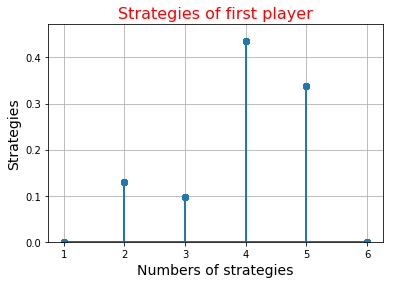

Оптимальное решение задачи линейного программирования для второго игрока = [0.         0.         0.11767399 0.02472527 0.02518315 0.00274725]
Отимальная смешанная стратегия второго игрока =  [0.         0.         0.69086022 0.14516129 0.14784946 0.01612903]


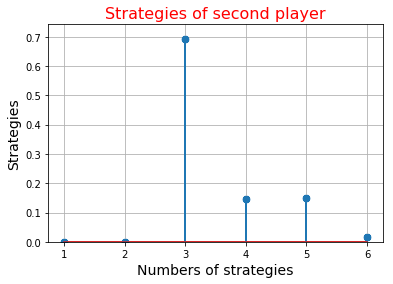

In [19]:
A = np.array([[4, 0, 6, 2, 2, 1],
              [3, 8, 4, 10, 4, 4],
              [1, 2 ,6, 5, 0, 0],
              [6, 6, 4, 4, 10, 3],
              [10,4,6,4,0,9],
              [10,7,0,7,9,8]])
#print(np.min(np.matrix(A)))
nash_equilibrium(A)

Существует решение в чистых стратегиях
Значение игры = 6.000000000000002
Оптимальное решение задачи линейного программирования для первого игрока = [0.         0.         0.16666667 0.        ]
Отимальная смешанная стратегия первого игрока =  [0. 0. 1. 0.]


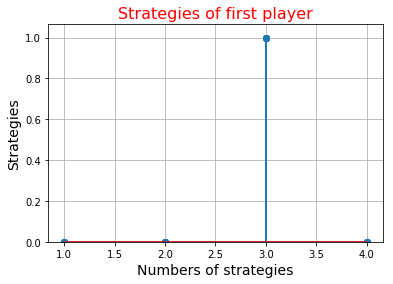

Оптимальное решение задачи линейного программирования для второго игрока = [0.         0.16666667 0.         0.         0.        ]
Отимальная смешанная стратегия второго игрока =  [0. 1. 0. 0. 0.]


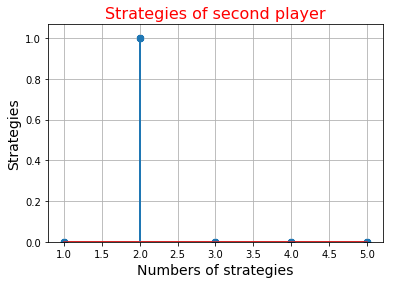

In [20]:
A = np.array([[4, 5, 6, 7, 9],
              [3, 4, 6, 7, 6],
              [7, 6, 10, 8, 11],
              [8, 5, 4, 7, 3]])
nash_equilibrium(A)

Спектр оптимальной стратегии полон
Значение игры = -0.08333333333333304
Оптимальное решение задачи линейного программирования для первого игрока = [0.14893617 0.10638298]
Отимальная смешанная стратегия первого игрока =  [0.58333333 0.41666667]


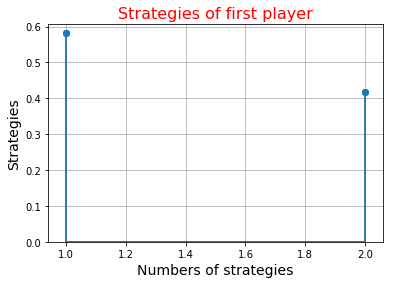

Оптимальное решение задачи линейного программирования для второго игрока = [0.14893617 0.10638298]
Отимальная смешанная стратегия второго игрока =  [0.58333333 0.41666667]


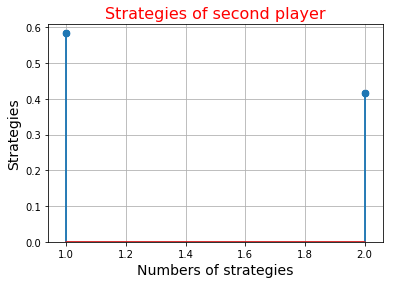

In [21]:
A = np.array([[2, -3],
              [-3, 4]])
nash_equilibrium(A)
